<a href="https://colab.research.google.com/github/TrevorChess25/abalone-data-mining/blob/main/project1_abalone_clf_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Data Clustering & Classification by Sex

Names: Trevor Chessnoe, Miguel LLanes, Olivia Schafer <br>
Date completed: 11-11-2024 <br>
Project 1: Group 6 <br>
Dataset: https://archive.ics.uci.edu/dataset/1/abalone

# A) Understanding and Visualizing the Data

## Import and Select Data

In [ ]:
import pandas as pd
abalone = pd.read_csv('abalone.data')

# Add column names
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Replace 'M' (Male), 'F' (Female), and 'I' (Infant) with 1, 2, and 3 respectively
abalone['Sex'] = abalone['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

# Create category labels for graphs later
category_labels = ['Male','Female','Infant']

# First 5 Entries
abalone.head(5)

<ipython-input-1-41680ed3ab37>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  abalone['Sex'] = abalone['Sex'].replace({'M': 0, 'F': 1, 'I': 2})


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## Understanding the Data

In [ ]:
print("Num of records:", abalone.shape[0])
print("Num of features:", abalone.shape[1])
features = abalone.columns.to_list()
print("Data features: ", features)

# Show avgs for abalone features
abalone_means = pd.DataFrame(abalone.mean())
abalone_means.columns = ['Abalone']

print(abalone_means)

Num of records: 4176
Num of features: 9
Data features:  ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
                 Abalone
Sex             0.955699
Length          0.524009
Diameter        0.407892
Height          0.139527
Whole weight    0.828818
Shucked weight  0.359400
Viscera weight  0.180613
Shell weight    0.238852
Rings           9.932471


# Sex distribution of Abalone

Male: 1527
Female: 1307
Infant: 1342


([<matplotlib.patches.Wedge at 0x7d64e0c50790>,
 [Text(0.4505832420352468, 1.0034813112345473, 'Male'),
  Text(-1.0893638813271649, -0.15259860438357511, 'Female'),
  Text(0.5854353282843888, -0.9312708931329005, 'Infant')],
 [Text(0.24577267747377096, 0.5473534424915711, '36.6%'),
  Text(-0.594198480723908, -0.08323560239104096, '31.3%'),
  Text(0.31932836088239386, -0.5079659417088547, '32.1%')])

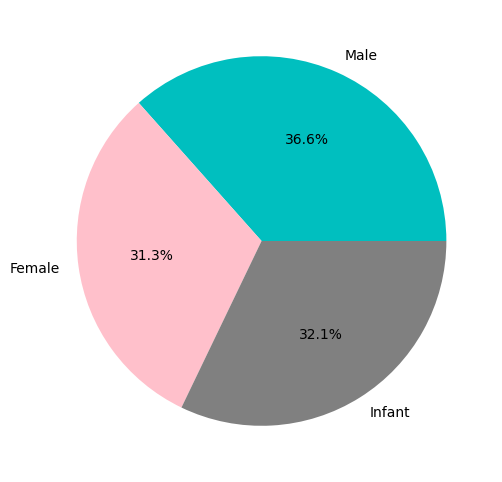

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Get count of each sex in dataset
sex_counts = abalone['Sex'].value_counts().sort_index()
pie_labels = category_labels
colors = ['c','pink','0.5']
for i in range(0,3):
  print(pie_labels[i]+": "+str(sex_counts[i]))
plt.pie(sex_counts, labels=pie_labels, colors=colors, autopct='%1.1f%%')

# B) Clustering

## Separating the Sex Attribute (Label)

In [ ]:
abalone_nl = abalone.drop(columns='Sex')
# Create labels vector to filter plot data later
labels = abalone['Sex'].to_numpy()

##Preprocessing: Scaling & PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize value ranges for features
scaler = StandardScaler()
abalone_scaled = scaler.fit_transform(abalone_nl)

# Project 8-D wine data to 2-D space for graphing
pca = PCA(n_components=2)
proj_abalone = pca.fit_transform(abalone_scaled)

print(pd.DataFrame(proj_abalone).head(5))

# Explained variance represents the amount of original data's variance maintained after PCA
# High percentages mean the projected data captures most of the variance
print("Explained Variance: ", pca.explained_variance_ratio_)

          0         1
0 -3.483808 -0.092029
1 -0.536489 -0.048832
2 -1.458203  0.419349
3 -3.767037 -0.065034
4 -2.608167  0.024552
Explained Variance:  [0.83911976 0.08690009]


##Determining Optimal Number of Clusters Using the Elbow Method

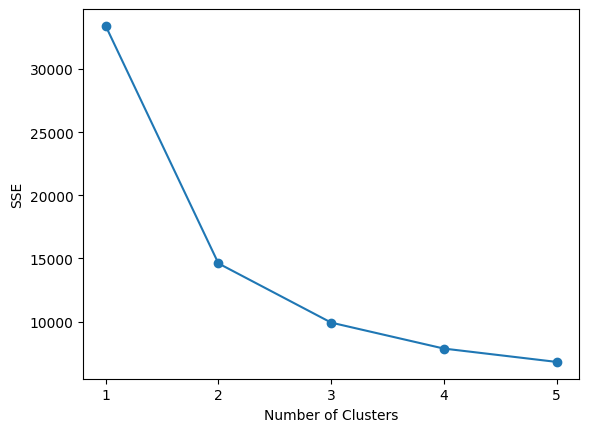

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans

SSE = []
for k in range(1, 6):
    k_means = KMeans(n_clusters = k)
    k_means.fit(abalone_scaled)
    SSE.append(k_means.inertia_)

plt.plot(range(1, 6), SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#Format x axis to hide decimal values
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

##Calculating SSE for k = 2 and k = 3

In [ ]:
#SSE when k = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(abalone_scaled)
sse = kmeans.inertia_
print("SSE when k = 2: ",sse)

#SSE when k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(abalone_scaled)
sse = kmeans.inertia_
print("SSE when k = 3: ",sse)

SSE when k = 2:  14607.5884781369
SSE when k = 3:  9918.747609987258


## Fit abalone data to Kmeans model (k=2)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2 Clusters
kmeans = KMeans(n_clusters=2)
# Calculate centroid positions and assign clusters
kmeans.fit(abalone_scaled)
# Get cluster assignment labels
cluster_labels = kmeans.labels_

#Calculate silhouette score for 2 clusters
silhouette_avg = silhouette_score(abalone_scaled, cluster_labels)
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.46937093816034287


## Graph Cluster assignments against sex distribution (k=2)

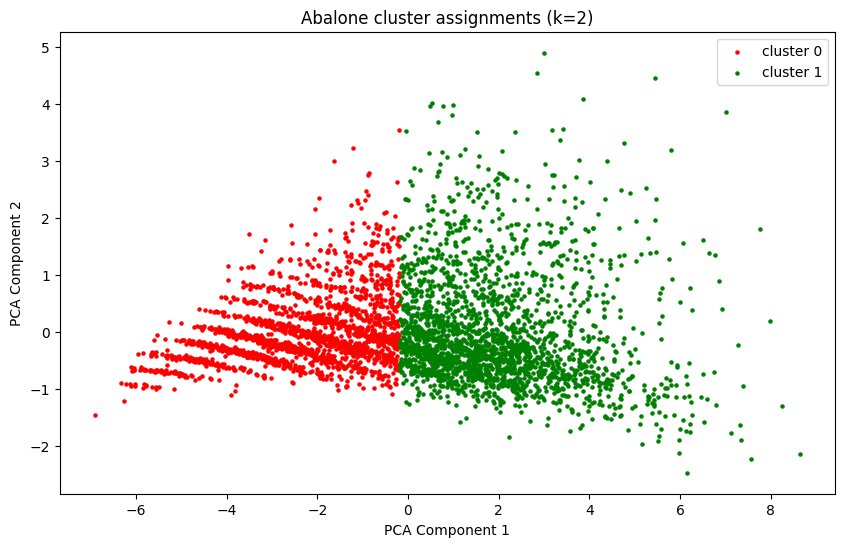

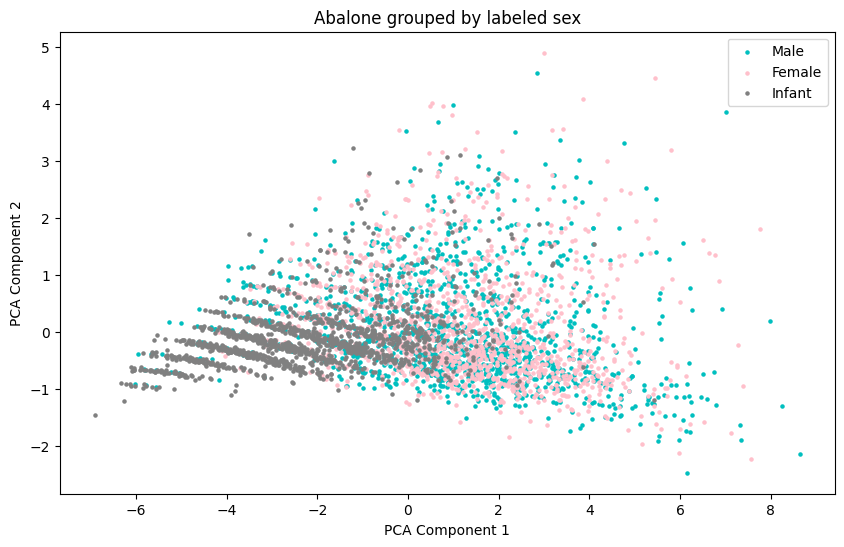

In [ ]:
# Assign 2D projections of data to X and y
X = proj_abalone[:,0]
y = proj_abalone[:,1]
point_size = 5

# Plot abalone data with cluster assignments
plt.figure(figsize=(10, 6))
plt.title("Abalone cluster assignments (k=2)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.scatter(X[cluster_labels == 0], y[cluster_labels == 0], color='r', s=point_size, label='cluster 0')
plt.scatter(X[cluster_labels == 1], y[cluster_labels == 1], color='g', s=point_size, label='cluster 1')
plt.legend()
plt.show()

# Plot abalone data with actual labels
plt.figure(figsize=(10, 6))
plt.title("Abalone grouped by labeled sex")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.scatter(X[labels == 0], y[labels == 0], color='c', s=point_size, label='Male')
plt.scatter(X[labels == 1], y[labels == 1], color='pink', s=point_size, label='Female')
plt.scatter(X[labels == 2], y[labels == 2], color='0.5', s=point_size, label='Infant')
plt.legend()
plt.show()

## Fit abalone data to Kmeans model (k=3)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3 Clusters
kmeans = KMeans(n_clusters=3)
# Calculate centroid positions and assign clusters
kmeans.fit(abalone)
# Get cluster assignment labels
cluster_labels = kmeans.labels_

#Calculate silhouette score for 3 clusters
silhouette_avg = silhouette_score(abalone, cluster_labels)
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.4487354544373408


## Graph Cluster assignments against sex distribution (k=3)

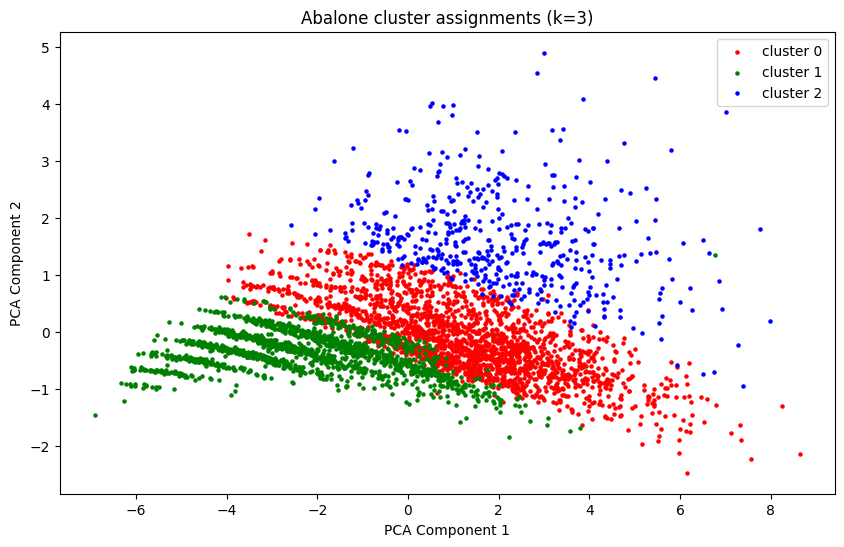

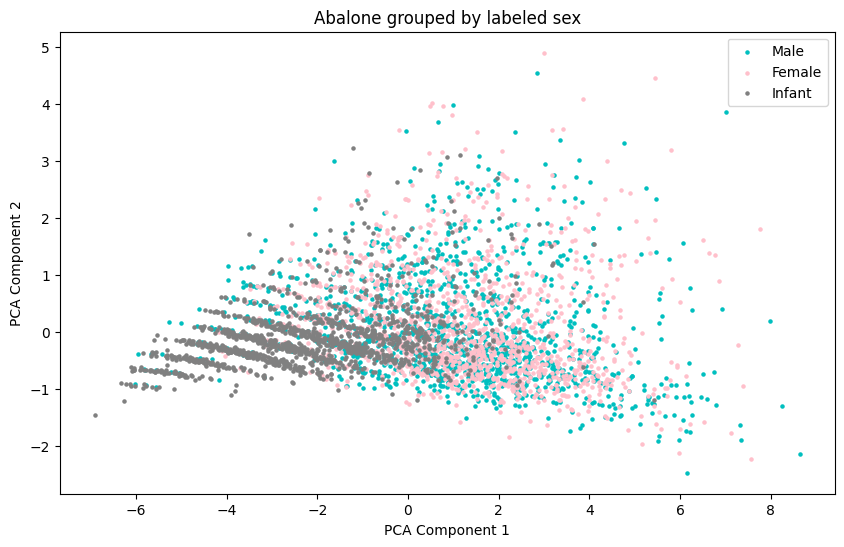

In [ ]:
# Plot abalone data with cluster assignments
plt.figure(figsize=(10, 6))
point_size = 5
plt.title("Abalone cluster assignments (k=3)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.scatter(X[cluster_labels == 0], y[cluster_labels == 0], color='r', s=point_size, label='cluster 0')
plt.scatter(X[cluster_labels == 1], y[cluster_labels == 1], color='g', s=point_size, label='cluster 1')
plt.scatter(X[cluster_labels == 2], y[cluster_labels == 2], color='b', s=point_size, label='cluster 2')
plt.legend()
plt.show()

# Plot abalone data with actual labels
plt.figure(figsize=(10, 6))
plt.title("Abalone grouped by labeled sex")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.scatter(X[labels == 0], y[labels == 0], color='c', s=point_size, label='Male')
plt.scatter(X[labels == 1], y[labels == 1], color='pink', s=point_size, label='Female')
plt.scatter(X[labels == 2], y[labels == 2], color='0.5', s=point_size, label='Infant')
plt.legend()
plt.show()

# C) Classification

# Classification using kNN = 3 and 70/30 Split


In [ ]:
# No need to use scaled data for clf
# Note: scaling data reduces acc by about 2%
# Features may be non-normally distributed
# OR outliers may be skewing normalized ranges
data = abalone_nl

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to get X_train, X_test, y_train, y_test values
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    test_size=0.3,
                                                    random_state=42)

## Fit model and make predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model for 2-NN
model = KNeighborsClassifier(n_neighbors=2)

# Fit & predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Actual labels
print("Actual: ", y_test)
# Predicted labels
print("Predicted: ", y_pred)

Actual:  [1 1 2 ... 0 0 1]
Predicted:  [0 0 0 ... 0 1 0]


## Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'macro'))
print("F1 Macro Score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy Score:  0.4932162809257781
Precision Score:  0.5300335143390463
Recall Score:  0.4805348773090709
F1 Macro Score:  0.48257339012416445


## Confusion Matrix

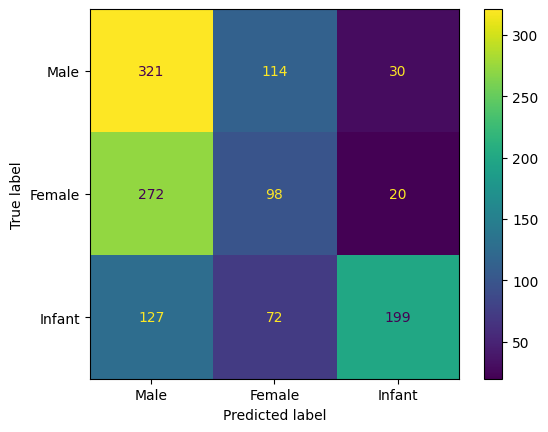

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_labels = category_labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot()

# Classification using kNN = 3 and 60/40 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Initialize model for 3-NN
model = KNeighborsClassifier(n_neighbors=3)

# Fit & predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Actual labels
print("Actual: ", y_test)
# Predicted labels
print("Predicted: ", y_pred)

Actual:  [1 1 2 ... 0 0 1]
Predicted:  [1 0 0 ... 2 1 1]


In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'macro'))
print("F1 Macro Score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy Score:  0.5522745411013568
Precision Score:  0.5564869104445158
Recall Score:  0.5511108063061378
F1 Macro Score:  0.5518017889672426


## Confusion Matrix

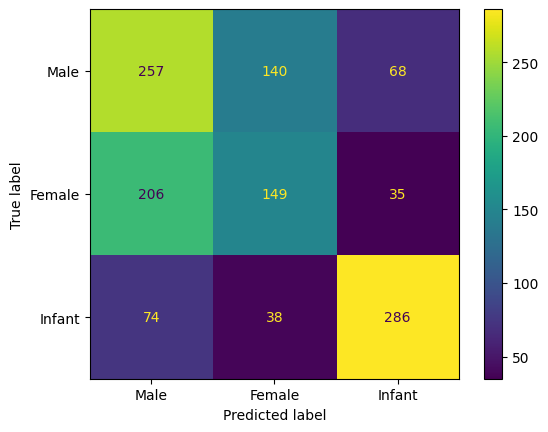

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot()